In [9]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('C:/Sonu/Dissertation_Final_Project/Deliverables/Dissertation_Report/Submission_Folder/Stress_Fault_Data_CSV/SA_CPU_ClusterVsPod-Backend.csv')
df.head(10)

CPU_Cluster  CPU_Pod_Backend
0      0.00270          0.00143
1      0.00173          0.00145
2      0.22500          0.01830
3      0.66400          0.05370
4      0.00185          0.00152
5      0.00176          0.00151
6      0.00182          0.00151
7      0.00178          0.00149
8      0.00169          0.00144
9      0.00178          0.00151

In [10]:
# Standardization of Variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=['CPU_Cluster','CPU_Pod_Backend'])

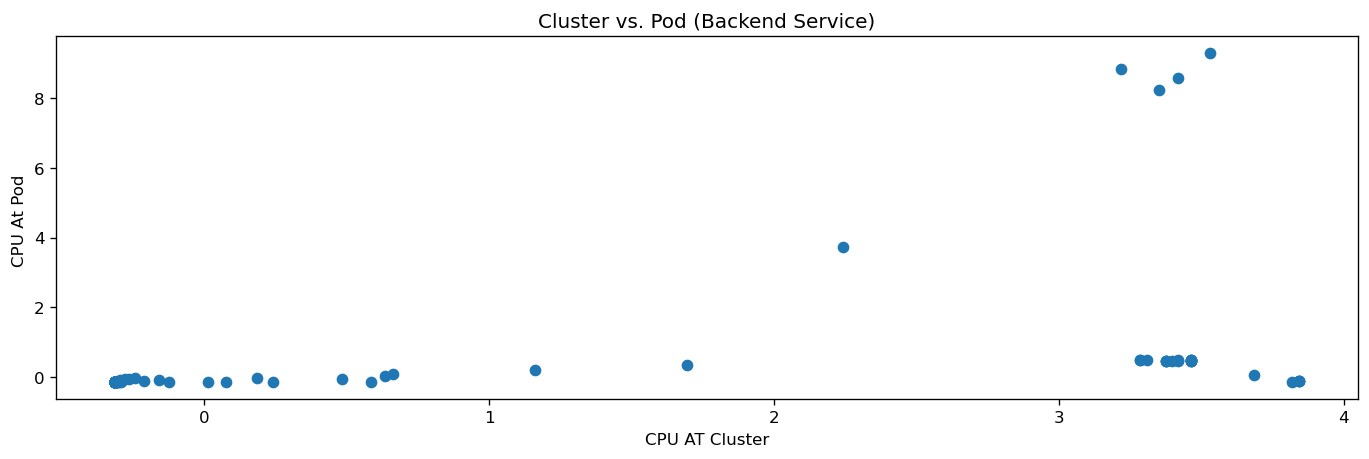

In [11]:
plt.figure(figsize=(14,4))
plt.scatter(df.CPU_Cluster, df.CPU_Pod_Backend)
plt.xlabel('CPU AT Cluster')
plt.ylabel('CPU At Pod ')
plt.title('Cluster vs. Pod (Backend Service)')
plt.show()

In [12]:
# K=3 , cause of natural sub clustering and only two features in considaration.Variable fitting to the model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(df)

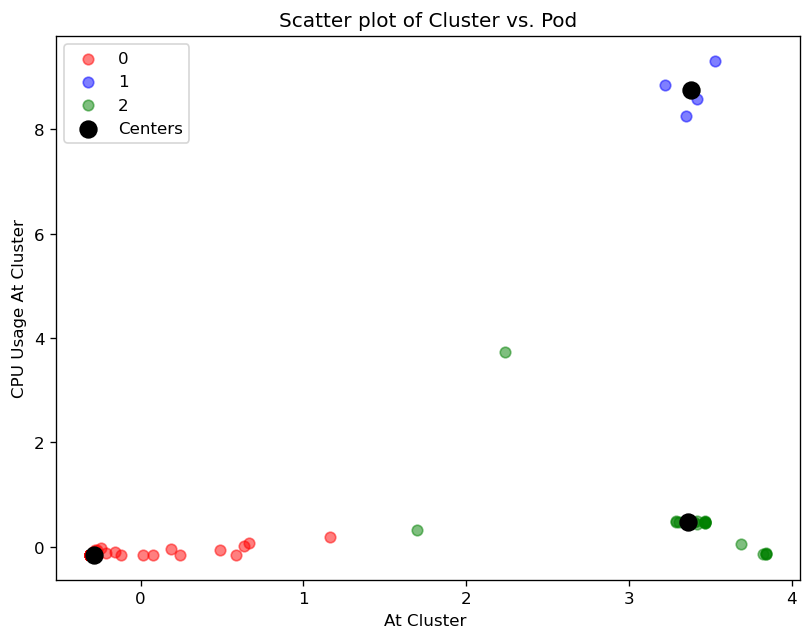

In [5]:
colors=["red","blue","green","orange"]
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].CPU_Cluster, df[model.labels_==i].CPU_Pod_Backend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of CPU Data",size=20)
plt.xlabel("At Cluster ")
plt.ylabel("CPU Usage At Cluster")
plt.title('Scatter plot of Cluster vs. Pod')
plt.legend()
plt.show()

In [13]:
def distance_from_center(CPU_Cluster, CPU_Pod_Backend, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
    :param float Cluster CPU Usage: the standardized CPU Usage of the data point 
    :param float Pod Cpu Usage: the standardized cpu at Pod of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    center_cls_u =  model.cluster_centers_[label,0]
    center_pod_bknd =  model.cluster_centers_[label,1]
    distance = np.sqrt((CPU_Cluster - center_cls_u) ** 2 + (CPU_Pod_Backend - center_pod_bknd) ** 2)
    return np.round(distance, 2)
df['label'] = model.labels_
df['distance'] = distance_from_center(df.CPU_Cluster, df.CPU_Pod_Backend, df.label)

In [15]:
# Sorting datafram to find the top outliers
outliers_idx = list(df.sort_values('distance', ascending=False).head(10).index)
outliers = df[df.index.isin(outliers_idx)]
print(outliers)

     CPU_Cluster  CPU_Pod_Backend  label  distance
3       1.160605         0.191580      0      1.49
104     0.635942         0.018673      0      0.94
119     0.584809        -0.154366      0      0.87
132     1.696384         0.332025      2      1.67
134     0.484768        -0.065461      0      0.78
162     0.664843         0.068359      0      0.98
282     3.841722        -0.129920      2      0.78
283     3.841722        -0.117532      2      0.77
292     3.841722        -0.132106      2      0.78
297     2.241055         3.724573      2      3.43


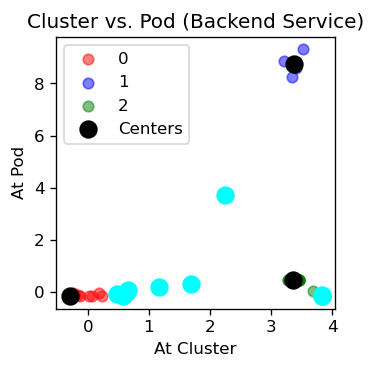

In [21]:
# figure setting
plt.figure(figsize=(3,3))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].CPU_Cluster, df[model.labels_==i].CPU_Pod_Backend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.CPU_Cluster, outliers.CPU_Pod_Backend, c='aqua', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of CPU Data",size=20)
plt.xlabel("At Cluster")
plt.ylabel("At Pod")
plt.title('Cluster vs. Pod (Backend Service)')
plt.legend()
plt.show()